# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
print("features are of shape",X_train.shape,"labels are of shape",y_train.shape,"shape",len(y_train))
print("features are of shape",X_test.shape,"labels are of shape",y_test.shape,"shape",len(y_test))

features are of shape (39209, 32, 32, 3) labels are of shape (39209,) shape 39209
features are of shape (12630, 32, 32, 3) labels are of shape (12630,) shape 12630


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import cv2
import sys #for printing progress
import tensorflow as tf

In [3]:
######### helper routine to get the length of the CSV file

def get_csv_len(fileName="./signnames.csv"):
    with open(fileName,"r") as csvfile:
        reader = csv.reader(csvfile,delimiter = ",")
        data = list(reader)
        row_count = len(data)
        return row_count-1,data
    
def print_status(iterator, total):
    sys.stdout.write('\r Completed %s %% '% (round(100*iterator/total) ))
    if iterator == total :
        sys.stdout.write('\n')
        sys.stdout.flush()
    return

In [4]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = (32,32,3)

# TODO: How many unique classes/labels there are in the dataset.
n_classes,class_list = get_csv_len()
class_list.pop(0)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
#print("class names", class_list)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

unique classes [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
unique_count [ 210 2220 2250 1410 1980 1860  420 1440 1410 1470 2010 1320 2100 2160  780
  630  420 1110 1200  210  360  330  390  510  270 1500  600  240  540  270
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]


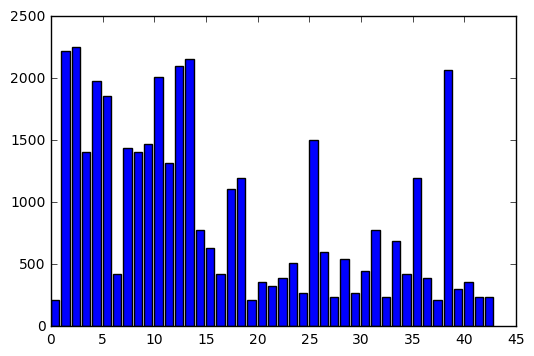

In [5]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

# Visualizations will be shown in the notebook.
%matplotlib inline

#y_train_unique = y_train
unique_classes,uclasses_index, unique_counts = np.unique(y_train, return_index = True, return_counts = True)
print("unique classes",unique_classes)
print("unique_count",unique_counts)
plt.bar( unique_classes, unique_counts, align='edge' )
plt.show()



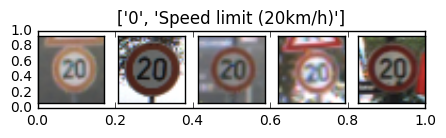

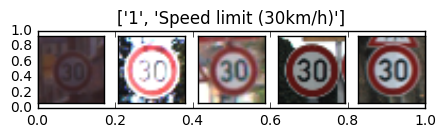

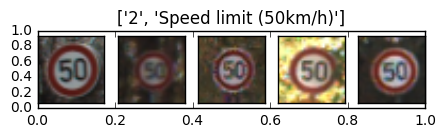

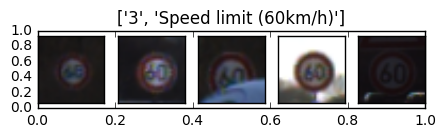

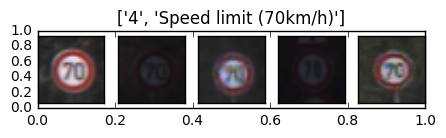

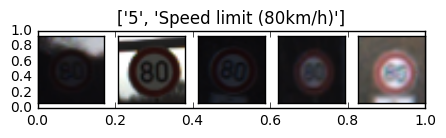

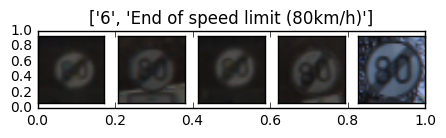

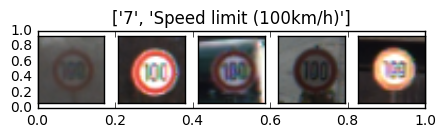

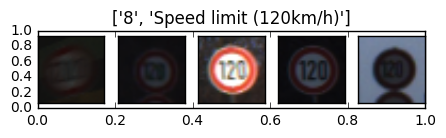

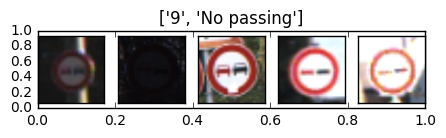

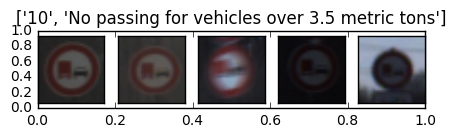

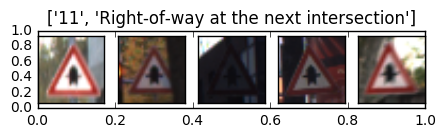

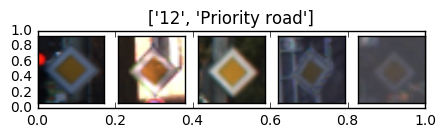

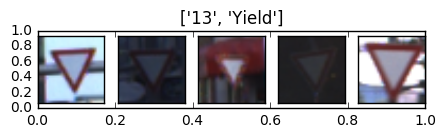

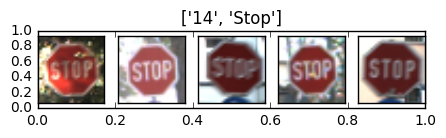

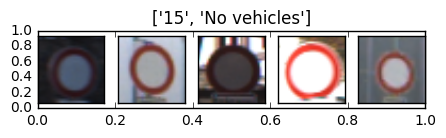

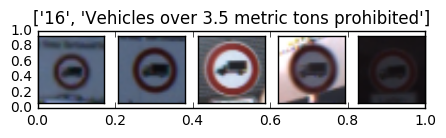

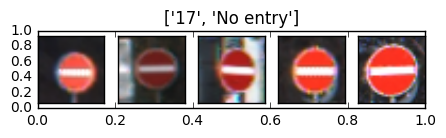

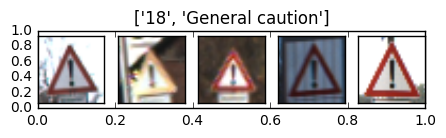

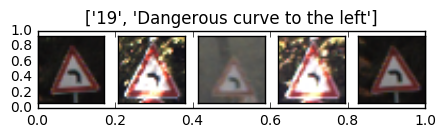

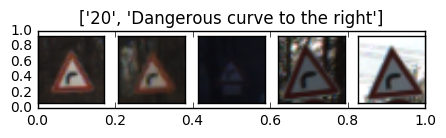

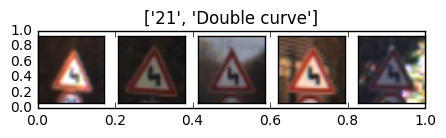

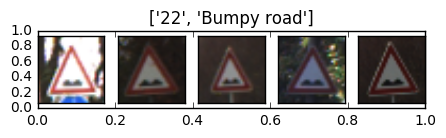

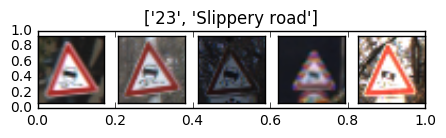

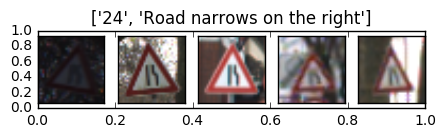

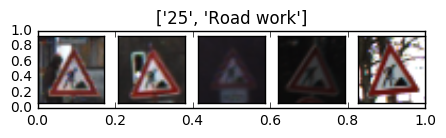

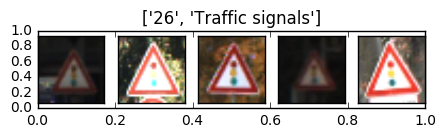

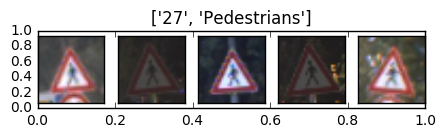

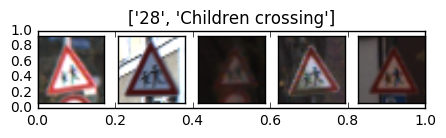

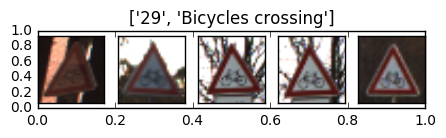

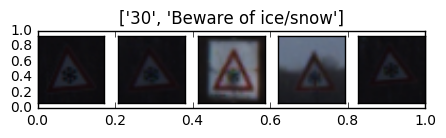

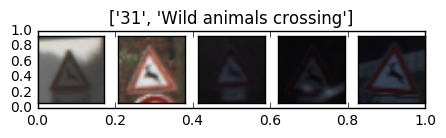

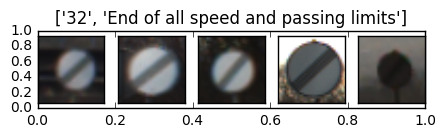

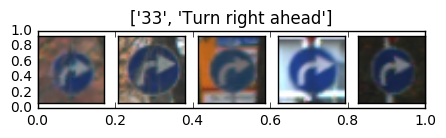

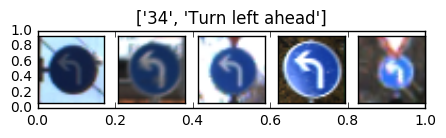

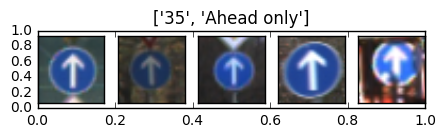

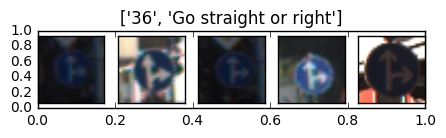

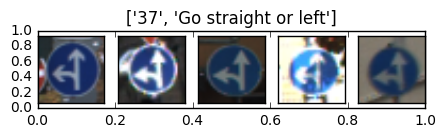

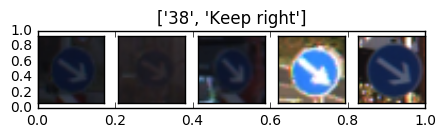

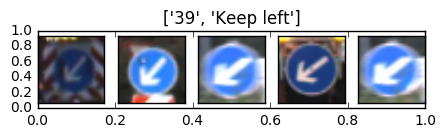

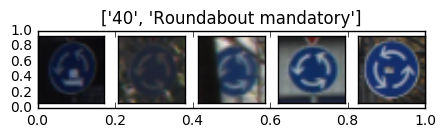

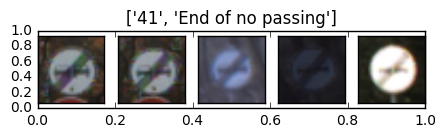

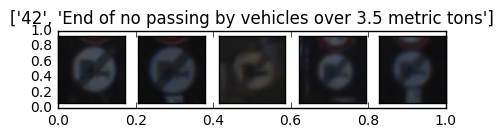

In [6]:
import random

def display_random(input_list ,num_of_images_from_each_class,cmap=None):
    """ Helper Routine to present random 5 images in each class """
    for uc, uc_index, uc_count in zip(unique_classes, uclasses_index, unique_counts):
        fig = plt.figure(figsize = (num_of_images_from_each_class, 1))
        plt.title(class_list[uc])
        random_indices = random.sample(range(uc_index, uc_index + uc_count), 10)
        for i in range (num_of_images_from_each_class):
            axis = fig.add_subplot(1, num_of_images_from_each_class, i + 1, xticks=[], yticks=[])
            axis.imshow(input_list[random_indices[i]],cmap)
        
        plt.show()
    return
    
    
display_random(input_list=X_train, num_of_images_from_each_class=5)

        

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

shape of ip_processed (39209, 32, 32)
 Completed 100 % shape of train_features (39209, 32, 32, 1)


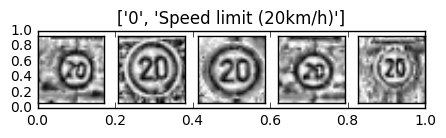

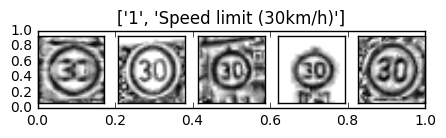

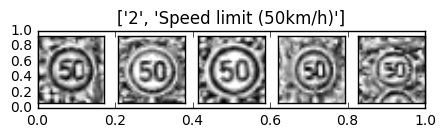

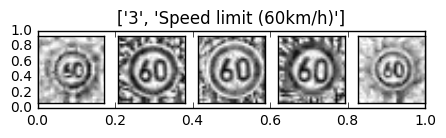

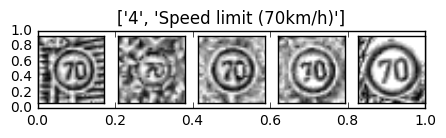

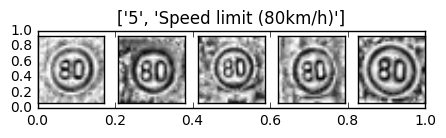

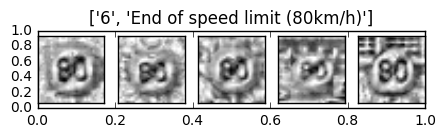

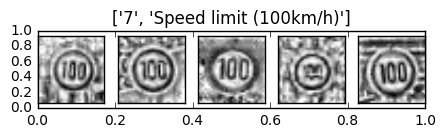

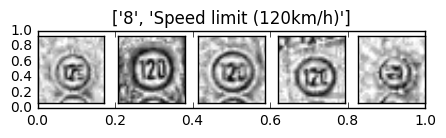

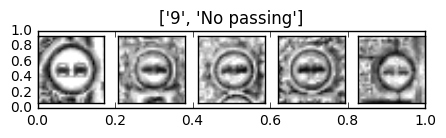

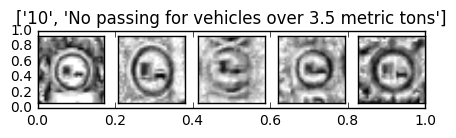

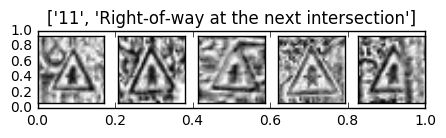

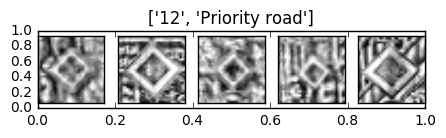

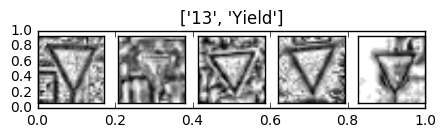

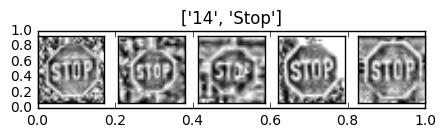

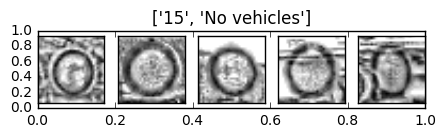

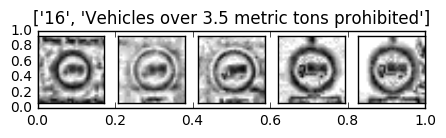

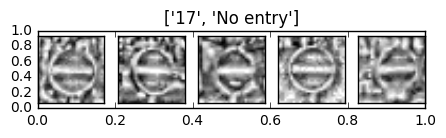

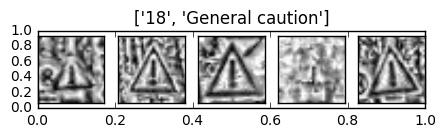

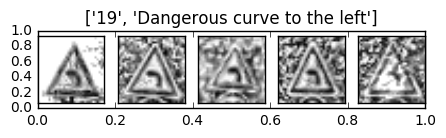

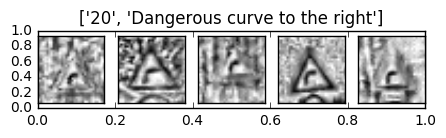

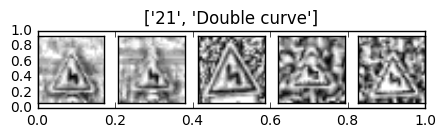

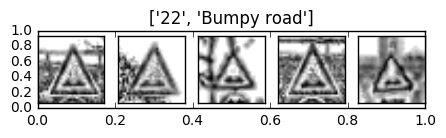

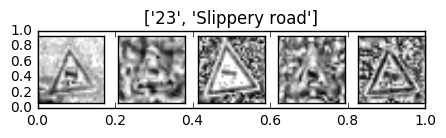

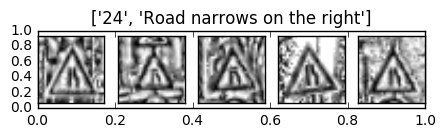

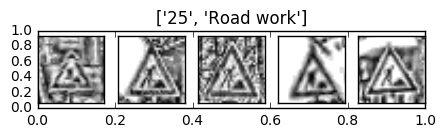

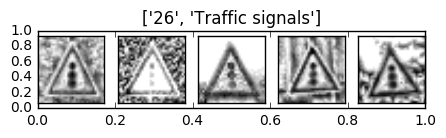

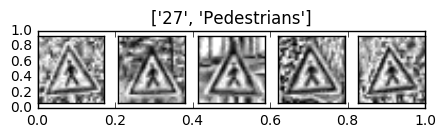

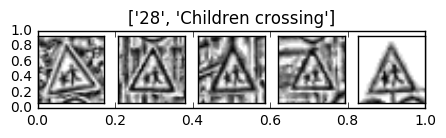

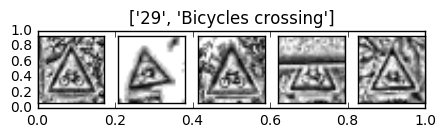

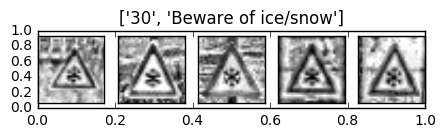

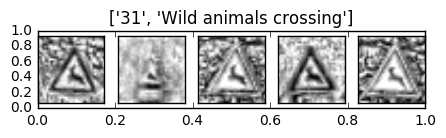

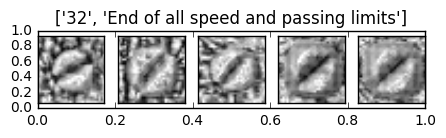

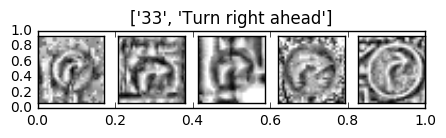

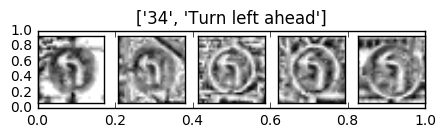

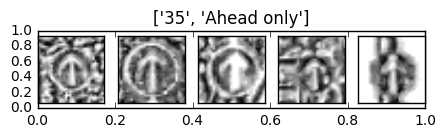

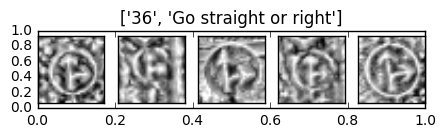

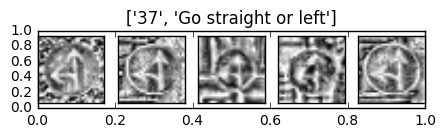

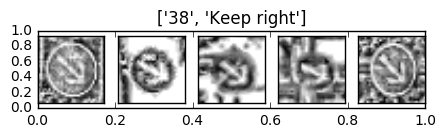

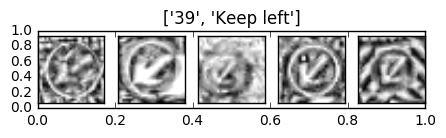

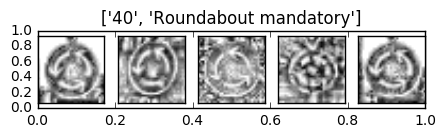

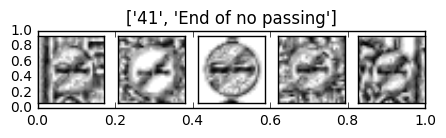

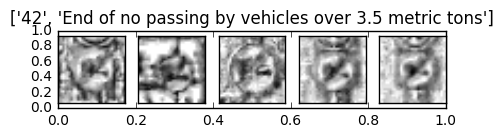

In [7]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.


def preprocess(ip):
    
    #convert every image in the input to YUV
    for cnt in range(len(ip)):
        image = ip[cnt]

        image = cv2.cvtColor(image,cv2.COLOR_RGB2YUV)

        image2 = image[:,:,0]
        

        clahe = cv2.createCLAHE()
        image2 = clahe.apply(image2)
            
        if 'ip_processed' not in dir():
            ip_processed = np.zeros_like(ip[:,:,:,0])
            print("shape of ip_processed", ip_processed.shape)  
        
        ip_processed[cnt] = image2
        print_status(cnt, len(ip))      
    return ip_processed

train_features = preprocess(ip=X_train)
train_features = train_features[:,:,:,np.newaxis]

print("shape of train_features", train_features.shape )
display_random(input_list=np.squeeze(train_features), num_of_images_from_each_class=5,cmap='gray')


#https://en.wikipedia.org/wiki/Histogram_equalization
#http://docs.opencv.org/3.2.0/d5/daf/tutorial_py_histogram_equalization.html


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
From a random display of the images. There is a range of contrast in the pictures, some are bright and some are dark. So to normalize, a local histogram normalization is prefered. Also, this idea was inspired from the LeCun paper.

The images are converted to YUV and did a histogram equalization(CLAHE) to capture the details in the images

In [8]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

from sklearn.model_selection import train_test_split

train_labels = y_train
train_features, valid_features, train_labels, valid_labels = train_test_split(train_features, train_labels, test_size = 0.25)


In [9]:
#Features and Labels

features_count = (train_features[0].size)
labels_count = len(unique_classes)
feature_shape = train_features[0].shape

EPOCHS = 40
BATCH_SIZE = 128
rate = 0.0005

#global_step = tf.Variable(0, trainable=False)
#boundaries = [10, 20]
#values = [0.001, 0.0003, 0.0001]
#rate = tf.train.piecewise_constant(global_step, boundaries, values)

print(feature_shape)

(32, 32, 1)


In [10]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    print("shapes",x.get_shape(), conv1_W.get_shape() )
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional.  Input = 14x14x6. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    ######## Addition: Layer 3. Convolutional
    # SOLUTION: Layer 3: Convolutional. Input = 5x5x16. Output = 3x3x32.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 16, 32), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(32))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
    # SOLUTION: Activation.
    conv3 = tf.nn.relu(conv3)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
#    conv3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    ######## SOLUTION: Add the Network output
    fc0_2   = flatten(conv2) # Flatten. Input = 5x5x16. Output = 400.
    fc0_1   = flatten(conv1) #Input = 14x14x16. Output = 1176.
    fc0_3   = flatten(conv3) # Input = 3x3x32 Output = 288
    
    fc0 = tf.concat_v2([fc0_1, fc0_2, fc0_3], 1) #Ip:400+1176+288 Out:1864
    
    #fc0 = tf.Variable()
    print("fc0 shape", fc0.get_shape())
    
    # SOLUTION: Layer 3: Fully Connected. Input = 1864. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1864, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b  

    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma)) ##change 43 to unique labels
    fc3_b  = tf.Variable(tf.zeros(43)) #change 43 to unique labels
    logits = tf.matmul(fc2, fc3_W) + fc3_b
     
    return logits



In [11]:
# LeNet features
features = tf.placeholder(tf.float32, shape = ( None, feature_shape[0], feature_shape[1],1) )

output = tf.placeholder(tf.int32, (None))
labels = tf.placeholder(tf.float32, shape = ( labels_count))

weights = tf.Variable(tf.truncated_normal(shape=( feature_shape[1] , labels_count)))
biases = tf.Variable(tf.zeros(labels_count))

one_hot_y = tf.one_hot(output, 43)



#setting up the LeNet pipeline
logits = LeNet(features)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)



shapes (?, 32, 32, 1) (5, 5, 1, 6)
fc0 shape (?, 1864)


In [12]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={features: batch_x, output: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [13]:
from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(train_features)
    
    print("Training...", num_examples)
    print()
    for i in range(EPOCHS):
        
        train_features, train_labels = shuffle(train_features, train_labels)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = train_features[offset:end], train_labels[offset:end]
            
            #print("shapes ", train_features.shape, batch_x.shape)
            sess.run(training_operation, feed_dict={features: batch_x, output: batch_y})

#        validation_accuracy = evaluate(X_validation, y_validation)
        validation_accuracy = evaluate(valid_features, valid_labels)
    
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")
    

    

Training... 29406

EPOCH 1 ...
Validation Accuracy = 0.453

EPOCH 2 ...
Validation Accuracy = 0.681

EPOCH 3 ...
Validation Accuracy = 0.776

EPOCH 4 ...
Validation Accuracy = 0.831

EPOCH 5 ...
Validation Accuracy = 0.859

EPOCH 6 ...
Validation Accuracy = 0.881

EPOCH 7 ...
Validation Accuracy = 0.900

EPOCH 8 ...
Validation Accuracy = 0.910

EPOCH 9 ...
Validation Accuracy = 0.914

EPOCH 10 ...
Validation Accuracy = 0.918

EPOCH 11 ...
Validation Accuracy = 0.925

EPOCH 12 ...
Validation Accuracy = 0.926

EPOCH 13 ...
Validation Accuracy = 0.929

EPOCH 14 ...
Validation Accuracy = 0.935

EPOCH 15 ...
Validation Accuracy = 0.936

EPOCH 16 ...
Validation Accuracy = 0.939

EPOCH 17 ...
Validation Accuracy = 0.942

EPOCH 18 ...
Validation Accuracy = 0.930

EPOCH 19 ...
Validation Accuracy = 0.933

EPOCH 20 ...
Validation Accuracy = 0.942

EPOCH 21 ...
Validation Accuracy = 0.947

EPOCH 22 ...
Validation Accuracy = 0.947

EPOCH 23 ...
Validation Accuracy = 0.938

EPOCH 24 ...
Validation 

In [14]:
#Load saved model


with tf.Session() as sess:
    saver.restore(sess, './lenet')

    X_test_preprocess = preprocess(X_test)

    X_test_preprocess = X_test_preprocess[:,:,:,np.newaxis]

    test_accuracy = evaluate(X_test_preprocess, y_test)
    
    print("Test Accuracy = {:.3f}".format(test_accuracy))


shape of ip_processed (12630, 32, 32)
 Completed 100 % Test Accuracy = 0.887


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I started initially with a simple LeNet model and then added the output from convlutional layers to feed a Fully connected network. This basically increases the size of the data for the fully connected network. Just used 75% of the data points for trainig the data. No additional data was generated. Additional data can be generated by doing a affine transformation on the data.



### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

### The Architecture is Defined below


My model is as below,
 Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6. Relu
Pooling. Input = 28x28x6. Output = 14x14x6.

Layer 2: Convolutional.  Input = 14x14x6. Output = 10x10x16. Relu
Pooling. Input = 10x10x16. Output = 5x5x16.

Layer 3: Convolutional. Input = 5x5x16. Output = 3x3x32. Relu

Layer 1+2+3:  Input: 400+1176+288 Output:1864

Layer 4: Fully Connected. Input = 1864. Output = 120 (tried 1200 too). Relu activated

Layer 5: Fully Connected. Input = 120 (tried 1200 as well no big difference). Output = 84 (430). Relu activated

Layer 6: Fully Connected. Input = 84 (tried 430 as well no big difference). Output = 43.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### The model training is defined here

Used Adam optimizer to train the model, which inherently has an exponential decay on learning rate. I observed the learning improving better with 0.0005 to start with. With even 20 Epochs the learning was getting saturated

Below is the summary of various Epochs, Model types and learning rates tried. 

#### batch size 64 
#### 2 layer conv and 3 layer logistic classifier
with 0.001 achieved 95.8% accuracy, in 20 Epochs
with 0.002 achieved 94.9% accuracy,  in 20 Epochs is the max

#### 3 layer conv and 3 layer logistic classifier
with 0.001 achieved 95.8% Accuracy, in 40 Epochs with 

#### 3 layer conv and 1 layer logistic classifier  -> learning was very slow. took about 17 epochs ro reach 90%
with 0.001 achieved 94.6% accuracy, in 40 Epochs with 

#### 3 layer conv and 1 layer logistic classifier + relu  -> There is no learning. Just fixed at a value. Because of the activation function in the end
with 0.001 achieved 5% accuracy, in 40 Epochs with 

#### 3 layer conv and 3 layer logistic classifier
with 0.001 achieved 96.6% (max 0.973), in 30 Epochs 

#### 3 layer conv and 3 layer logistic classifier
with 0.0003 achieved 96.6% (max 0.97), in 50 Epochs 

#### batch size 128 and 
#### learning rate 0.0005 achieved 0.969 (max 0.975) in 40 epochs ---> surprisingly reached 90% in 6 epochs. In 20 epochs reached 96%
Reahced Test accuracy 92.2%

#### learning rate 0.0001 achieved 0.944 (max 0.975) in 100 epochs 



### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I used the LeCun research paper as a reference. The inital convolutional networks filters the images and increases the dataset to learn from. From then onwards it is just a simple classifier, that generalizes to the salient features in the data using Fully connected logistic classifier 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [20]:
import os

def get_new_images():
    image_list = os.listdir('./new-images')
    new_image = np.zeros((6,32,32,3),dtype=np.uint16)
    #print(image_list)
    for idx, img in enumerate(image_list):
        image = cv2.imread('./new-images/'+img)
        new_image[int(idx)]=image
        
    return new_image

print(get_new_images().shape)
print(get_new_images().dtype)
    

(6, 32, 32, 3)
uint16


In [21]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()
BATCH_SIZE=1


def myevaluate(X_data, y_data):
    num_examples = len(X_data)
    print("num_examples",num_examples)    
    total_accuracy = 0
    sess = tf.get_default_session()

    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={features: batch_x, output: batch_y})
#        tf.Print(correct_prediction,[correct_prediction])
        total_accuracy += (accuracy * len(batch_x))
        print("accuracy",total_accuracy)
    return total_accuracy / num_examples

def predict_live_images(X_data):
    num_examples = len(X_data)
    sess = tf.get_default_session()
    
    for offset in range(num_examples):
        predictions = sess.run(logits, feed_dict={features:X_data})
        top_predictions = sess.run(tf.nn.top_k(predictions, k=6))
        #print("predictions", predictions)
    print("top_predictions",top_predictions)
    return

['13.png', '33.png', '34.png', '39.png', '40.png', '9.png']
images shape (6, 32, 32, 3)
['13', '33', '34', '39', '40', '9']


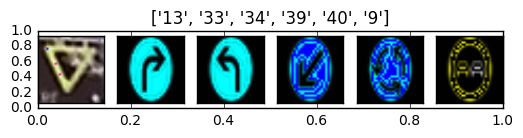

y_train (12630,)
shape (6, 32, 32, 3)
shape of ip_processed (6, 32, 32)
 Completed 83 % Model restored.
top_predictions TopKV2(values=array([[  3.69987041e-01,   2.89409310e-01,   2.33808592e-01,
          2.18338296e-01,   2.05551833e-01,   1.85234934e-01],
       [  3.69987041e-01,   2.89409310e-01,   2.33808592e-01,
          2.18338296e-01,   2.05551833e-01,   1.85234934e-01],
       [  3.69987041e-01,   2.89409310e-01,   2.33808592e-01,
          2.18338296e-01,   2.05551833e-01,   1.85234934e-01],
       [  3.69987041e-01,   2.89409310e-01,   2.33808592e-01,
          2.18338296e-01,   2.05551833e-01,   1.85234934e-01],
       [  3.69987041e-01,   2.89409310e-01,   2.33808592e-01,
          2.18338296e-01,   2.05551833e-01,   1.85234934e-01],
       [  6.98070557e+02,   3.23639740e+02,   3.15521545e+02,
          2.99959045e+02,   1.65112091e+02,   1.24577126e+02]], dtype=float32), indices=array([[35, 26, 33, 12, 13, 32],
       [35, 26, 33, 12, 13, 32],
       [35, 26, 33, 12, 1

In [22]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os
import numpy as np 
#from tf_utils import weight_variable, bias_variable, dense_to_one_hot

#from PIL import Image
image_list = os.listdir('./new-images')
print(image_list)
images = get_new_images() #[cv2.imread('./new-images/'+img) for img in image_list]
print("images shape",np.shape(images))
uc = [os.path.splitext(img)[0] for img in image_list ]
print(uc)

num_of_images_from_each_class =6
fig = plt.figure(figsize = (num_of_images_from_each_class, 1))
#plt.title(class_list[uc])
plt.title(uc)

random_indices = 1
#        random_indices = (range(uc_index, uc_index + num_of_images_from_each_class)) #first 10 samples of each class
        
for i in range (len(uc)):
    axis = fig.add_subplot(1, num_of_images_from_each_class, i + 1, xticks=[], yticks=[])
    axis.imshow(images[i])
plt.show()


new_test = np.array([13, 33, 34, 39, 40, 9])
num_classes = 6
#new_test_one_hot =  tf.one_hot(new_test, num_classes)
print('y_train',y_test.shape)
print("shape",images.shape)

with tf.Session() as sess:
    saver.restore(sess, './lenet')
    X_test_preprocess = preprocess(images)
    X_test_preprocess = X_test_preprocess[:,:,:,np.newaxis]    
    print("Model restored.")
    predict_live_images(X_test_preprocess)
    

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [25]:
prediction = tf.nn.softmax(logits)
top5 = tf.nn.top_k(prediction, k=5)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    top5_prediction = sess.run([prediction, top5], feed_dict={features: train_features});
    print(top5_prediction)

[array([[  3.43127451e-25,   4.16285711e-21,   4.98402089e-27, ...,
          7.61951232e-22,   0.00000000e+00,   0.00000000e+00],
       [  3.51201337e-26,   1.00000000e+00,   1.87621789e-21, ...,
          5.59327777e-22,   0.00000000e+00,   6.28599094e-34],
       [  3.63627803e-17,   1.32604907e-06,   9.99995589e-01, ...,
          3.12939210e-06,   2.53345370e-12,   1.78222281e-11],
       ..., 
       [  3.36663147e-23,   1.00000000e+00,   8.58011553e-17, ...,
          1.11308936e-23,   4.13294033e-34,   1.27627390e-25],
       [  3.10281720e-27,   1.00000000e+00,   3.90774018e-18, ...,
          7.86159950e-20,   0.00000000e+00,   8.87371470e-31],
       [  1.21918013e-20,   2.31366678e-21,   2.43236595e-19, ...,
          6.38781639e-16,   3.39404779e-37,   2.23729224e-32]], dtype=float32), TopKV2(values=array([[  1.00000000e+00,   4.16285711e-21,   7.61951232e-22,
          3.02565745e-22,   1.25486995e-22],
       [  1.00000000e+00,   1.87621789e-21,   5.59327777e-22,
      

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.